In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [540]:
path = '../../juan_gomila/datasets/bank/bank.csv'

In [541]:
data = pd.read_csv(path, sep=";")

In [542]:
data['cod'] = np.arange(1, len(data)+1)

In [543]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,cod
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no,1
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no,2
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no,3
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no,4
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no,5


In [544]:
data.to_csv('datasets/bank.csv', index=False)

In [548]:
path = 'datasets/bank.csv'
data = pd.read_csv(path, sep=",")
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,cod
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no,1
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no,2
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no,3
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no,4
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no,5


In [549]:
data.shape

(4119, 22)

In [550]:
data.columns.values

array(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'cod'],
      dtype=object)

In [551]:
data["y"] = (data["y"]=="yes").astype(int)

In [552]:
data.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,cod
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,...,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,0,4115
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,...,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,0,4116
4116,27,student,single,high.school,no,no,no,cellular,may,mon,...,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,0,4117
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,...,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,0,4118
4118,34,management,single,high.school,no,yes,no,cellular,nov,wed,...,999,0,nonexistent,-0.1,93.200,-42.0,4.120,5195.8,0,4119


In [553]:
data["education"].unique()

array(['basic.9y', 'high.school', 'university.degree',
       'professional.course', 'basic.6y', 'basic.4y', 'unknown',
       'illiterate'], dtype=object)

In [554]:
data["education"] = np.where(data["education"]=="basic.4y", "Basic", data["education"])
data["education"] = np.where(data["education"]=="basic.6y", "Basic", data["education"])
data["education"] = np.where(data["education"]=="basic.9y", "Basic", data["education"])

data["education"] = np.where(data["education"]=="high.school", "Basic", data["education"])
data["education"] = np.where(data["education"]=="professional.course", "Professional Course", data["education"])
data["education"] = np.where(data["education"]=="university.degree", "University Degree", data["education"])

data["education"] = np.where(data["education"]=="illiterate", "Illiterate", data["education"])
data["education"] = np.where(data["education"]=="unknown", "Unknown", data["education"])

In [555]:
data["education"].unique()

array(['Basic', 'University Degree', 'Professional Course', 'Unknown',
       'Illiterate'], dtype=object)

In [556]:
data["y"].value_counts()

0    3668
1     451
Name: y, dtype: int64

In [557]:
def datos_nulos(datos):
    columnas = datos.columns.values.tolist()
    for c,i in enumerate(columnas):
        p = columnas[c]
        v = pd.isna(datos[columnas[c]]).values.ravel().sum()
        print("Columnas {} = {}".format(p, v))

In [558]:
datos_nulos(data)

Columnas age = 0
Columnas job = 0
Columnas marital = 0
Columnas education = 0
Columnas default = 0
Columnas housing = 0
Columnas loan = 0
Columnas contact = 0
Columnas month = 0
Columnas day_of_week = 0
Columnas duration = 0
Columnas campaign = 0
Columnas pdays = 0
Columnas previous = 0
Columnas poutcome = 0
Columnas emp.var.rate = 0
Columnas cons.price.idx = 0
Columnas cons.conf.idx = 0
Columnas euribor3m = 0
Columnas nr.employed = 0
Columnas y = 0
Columnas cod = 0


<AxesSubplot:xlabel='education', ylabel='count'>

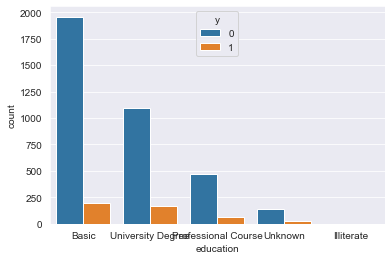

In [559]:
sns.set_style('darkgrid')
sns.countplot(x='education', hue='y', data=data)

Text(0, 0.5, 'Frecuencia de compra')

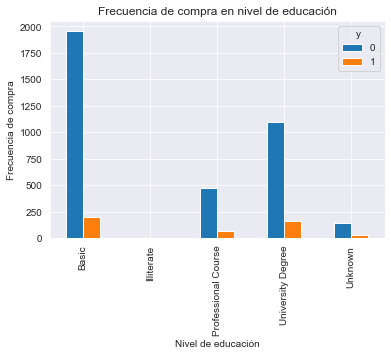

In [560]:
%matplotlib inline
pd.crosstab(data.education, data.y).plot(kind="bar")
plt.title("Frecuencia de compra en nivel de educación")
plt.xlabel("Nivel de educación")
plt.ylabel("Frecuencia de compra")

Text(0, 0.5, 'Frecuencia de compra del producto')

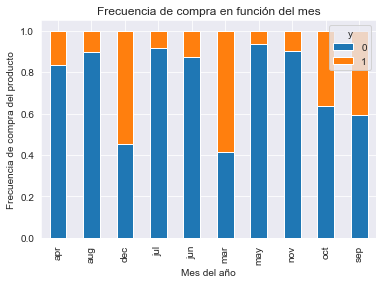

In [563]:
table=pd.crosstab(data.month, data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.title("Frecuencia de compra en función del mes")
plt.xlabel("Mes del año")
plt.ylabel("Frecuencia de compra del producto")

Text(0, 0.5, 'Cliente')

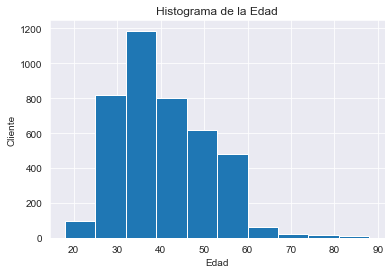

In [564]:
%matplotlib inline
data.age.hist()
plt.title("Histograma de la Edad")
plt.xlabel("Edad")
plt.ylabel("Cliente")

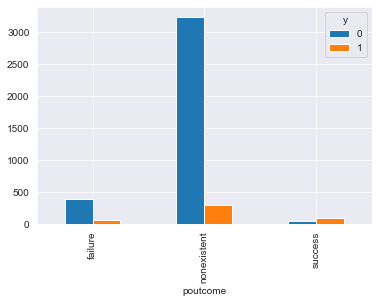

In [565]:
table=pd.crosstab(data.poutcome, data.y).plot(kind="bar")

In [566]:
esnulo = data['age'].isna().sum()
noesnulo = data['age'].notna().sum()
total_datos_age = esnulo + noesnulo
print("""
Información de la columna Age:

Datos Nulos: {}
Datos No Nulos: {}
Total de los datos: {}
""".format(esnulo, noesnulo, total_datos_age))


Información de la columna Age:

Datos Nulos: 0
Datos No Nulos: 4119
Total de los datos: 4119



In [567]:
## data['default'] = data['default1']
## data['month'] = data['month1']

In [568]:
## data = data.drop(['default1','month1'], axis=1)

In [569]:
data.columns.values.tolist()

['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'y',
 'cod']

In [570]:
# Se crea una función para automatizar el proceso de crear variables dummies
def variables_dummie(datos):
    lista_conc = []
    lista_conc.append(datos)    
    for indice, variables in enumerate(columnas):
        d = pd.get_dummies(datos[columnas[indice]], prefix = columnas[indice]).iloc[:,1:]
        lista_conc.append(d)            
    conc = pd.concat(lista_conc, axis=1)
    return conc

In [571]:
columnas = ["job", "marital", "education", "housing", "loan", "contact", "month", "day_of_week", "poutcome"]
new_data = variables_dummie(data)

In [572]:
new_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,30,blue-collar,married,Basic,no,yes,no,cellular,may,fri,...,1,0,0,0,0,0,0,0,1,0
1,39,services,single,Basic,no,no,no,telephone,may,fri,...,1,0,0,0,0,0,0,0,1,0
2,25,services,married,Basic,no,yes,no,telephone,jun,wed,...,0,0,0,0,0,0,0,1,1,0
3,38,services,married,Basic,no,unknown,unknown,telephone,jun,fri,...,0,0,0,0,0,0,0,0,1,0
4,47,admin.,married,University Degree,no,yes,no,cellular,nov,mon,...,0,1,0,0,1,0,0,0,1,0


In [573]:
data_vars = new_data.columns.values.tolist()
to_keep = (v for v in data_vars if v not in columnas)
to_keep = (v for v in to_keep if v not in ["default"])
bank_data = new_data[to_keep]
bank_data.columns.values

array(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       'cod', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_married', 'marital_single',
       'marital_unknown', 'education_Illiterate',
       'education_Professional Course', 'education_University Degree',
       'education_Unknown', 'housing_unknown', 'housing_yes',
       'loan_unknown', 'loan_yes', 'contact_telephone', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'day_of_week_mon',
       'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed',
       'poutcome_nonexistent', 'poutcome_success'], dtype=object)

In [574]:
bank_data.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,30,487,2,999,0,-1.8,92.893,-46.2,1.313,5099.1,...,1,0,0,0,0,0,0,0,1,0
1,39,346,4,999,0,1.1,93.994,-36.4,4.855,5191.0,...,1,0,0,0,0,0,0,0,1,0
2,25,227,1,999,0,1.4,94.465,-41.8,4.962,5228.1,...,0,0,0,0,0,0,0,1,1,0
3,38,17,3,999,0,1.4,94.465,-41.8,4.959,5228.1,...,0,0,0,0,0,0,0,0,1,0
4,47,58,1,999,0,-0.1,93.200,-42.0,4.191,5195.8,...,0,1,0,0,1,0,0,0,1,0


In [575]:
bank_data_vars = bank_data.columns.values.tolist()
Y = ['y']
X = (v for v in bank_data_vars if v not in Y)

## Selección columnas para el modelo

In [576]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [577]:
lr = LogisticRegression()

In [578]:
n = 10
rfe = RFE(lr, n)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [579]:
rfe = rfe.fit(bank_data[X], bank_data[Y].values.ravel())

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [475]:
z = zip(bank_data_vars, rfe.support_, rfe.ranking_)
list(z)

[('age', False, 31),
 ('duration', False, 30),
 ('campaign', False, 20),
 ('pdays', False, 36),
 ('previous', True, 1),
 ('emp.var.rate', False, 19),
 ('cons.price.idx', False, 23),
 ('cons.conf.idx', False, 22),
 ('euribor3m', True, 1),
 ('nr.employed', False, 27),
 ('y', False, 4),
 ('job_blue-collar', True, 1),
 ('job_entrepreneur', False, 29),
 ('job_housemaid', False, 3),
 ('job_management', False, 9),
 ('job_retired', False, 2),
 ('job_self-employed', False, 6),
 ('job_services', False, 35),
 ('job_student', False, 25),
 ('job_technician', False, 10),
 ('job_unemployed', False, 32),
 ('job_unknown', False, 17),
 ('marital_married', False, 18),
 ('marital_single', False, 39),
 ('marital_unknown', False, 37),
 ('education_Illiterate', False, 15),
 ('education_Professional Course', False, 16),
 ('education_University Degree', False, 8),
 ('education_Unknown', False, 13),
 ('housing_unknown', False, 33),
 ('housing_yes', False, 7),
 ('loan_unknown', False, 14),
 ('loan_yes', False, 5

In [580]:
columnas_validas = ["cod","previous", "euribor3m", "job_blue-collar", "month_aug", "month_dec", "month_jul", "month_jun", "month_mar", "day_of_week_wed", "poutcome_nonexistent"]

In [581]:
X = bank_data[columnas_validas]
Y = bank_data["y"]

## Implementación del modelo en Python con stasmodel.api

In [582]:
import statsmodels.api as sm

In [583]:
logit_model = sm.Logit(Y, X)

In [584]:
result = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.291431
         Iterations 7


In [585]:
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: Logit
=====================================================================
Model:                Logit             Pseudo R-squared:  0.156     
Dependent Variable:   y                 AIC:               2422.8089 
Date:                 2021-11-05 15:18  BIC:               2492.3659 
No. Observations:     4119              Log-Likelihood:    -1200.4   
Df Model:             10                LL-Null:           -1422.9   
Df Residuals:         4108              LLR p-value:       2.3939e-89
Converged:            1.0000            Scale:             1.0000    
No. Iterations:       7.0000                                         
---------------------------------------------------------------------
                      Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------
cod                  -0.0001   0.0000  -2.7378 0.0062 -0.0002 -0.0000
previous              0.0226   0.0776   0.2915 0.7707 -0.1295  0.1747
euribor3m            -0.5790   0.0370 -15.6419 0.0000 -0.6516 -0.5065
job_blue-collar      -0.5119   0.1511  -3.3872 0.0007 -0.8080 -0.2157
month_aug             0.5624   0.1699   3.3108 0.0009  0.2295  0.8953
month_dec             1.2127   0.4498   2.6960 0.0070  0.3311  2.0943
month_jul             0.9385   0.1827   5.1379 0.0000  0.5805  1.2966
month_jun             1.0224   0.1693   6.0376 0.0000  0.6905  1.3543
month_mar             1.6720   0.3129   5.3427 0.0000  1.0586  2.2853
day_of_week_wed      -0.0502   0.1388  -0.3617 0.7176 -0.3222  0.2218
poutcome_nonexistent -0.5522   0.1394  -3.9620 0.0001 -0.8253 -0.2790
=====================================================================

"""

## Implementación del modelo en Python con scikit-learn

In [586]:
from sklearn import linear_model

In [587]:
logit_model = linear_model.LogisticRegression()
logit_model.fit(X,Y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [588]:
logit_model.score(X,Y)

0.8958485069191552

In [589]:
Y.mean()

0.10949259529011895

In [590]:
1-Y.mean()

0.8905074047098811

In [591]:
pd.DataFrame(list(zip(X.columns, np.transpose(logit_model.coef_))))

,0,1
0,cod,[-2.973536122125319e-05]
1,previous,[0.4061607373925105]
2,euribor3m,[-0.5624954506044919]
3,job_blue-collar,[-0.6964053104600063]
4,month_aug,[0.4543945095162446]
5,month_dec,[0.32055697125512145]
6,month_jul,[0.8498408180693487]
7,month_jun,[1.0851662534880653]
8,month_mar,[0.8514279632236635]
9,day_of_week_wed,[0.09112127226618748]


## Validar modelo

In [592]:
from sklearn.model_selection import train_test_split

In [593]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state=0)
lm = LogisticRegression()
lm.fit(X_train, Y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [594]:
probs = lm.predict_proba(X_test)

In [595]:
probs

array([[0.94807296, 0.05192704],
       [0.84582325, 0.15417675],
       [0.92928833, 0.07071167],
       ...,
       [0.69477522, 0.30522478],
       [0.97291837, 0.02708163],
       [0.60526729, 0.39473271]])

In [596]:
prediction = lm.predict(X_test)
prediction

array([0, 0, 0, ..., 0, 0, 0])

In [597]:
prob = probs[:,1]

In [598]:
prob_df = pd.DataFrame(prob)
threshold = 0.5
prob_df["prediction"] = np.where(prob_df[0]>threshold,1,0)
prob_df.head()

,0,prediction
0,0.051927,0
1,0.154177,0
2,0.070712,0
3,0.063514,0
4,0.032156,0


In [599]:
len(prob_df), len(X_test)

(1236, 1236)

In [600]:
len(prediction)

1236

In [601]:
prediction = lm.predict(X_train)
probs = lm.predict_proba(X_train)

In [602]:
prob = probs[:,1]

In [603]:
data_x = X_train
data_x['prediction'] = prediction
data_x['prob'] = prob

<ipython-input-603-ff6a978078e8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_x['prediction'] = prediction
<ipython-input-603-ff6a978078e8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_x['prob'] = prob


In [604]:
data_export = data_x["prob"]>0.5

In [605]:
len(data_x), len(data_export)

(2883, 2883)

In [606]:
data_export.head()

4070    False
1240    False
349     False
3706    False
4043    False
Name: prob, dtype: bool

## Validación cruzada

In [607]:
from sklearn.model_selection import cross_val_score

In [608]:
scores = cross_val_score(linear_model.LogisticRegression(),X,Y,scoring="accuracy", cv=10)
scores

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

array([0.90291262, 0.88592233, 0.90533981, 0.89805825, 0.89805825,
       0.89563107, 0.88592233, 0.89320388, 0.88834951, 0.89294404])

In [609]:
scores.mean()

0.894634209718187

## Crear archivo exportable

In [610]:
final_data = pd.DataFrame(
    {
        'Cod': X_train.cod,
        'Acepta': prediction
    }
)

In [611]:
final_data.to_csv('datasets/result.csv', index=False)

In [612]:
len(X_train)

2883

## Crear predicción

In [657]:
path_p = 'datasets/bank_predic.csv'

In [658]:
data_pre = pd.read_csv(path_p)

In [659]:
data_pre.columns.values

array(['age', 'job', 'marital', 'education', 'default1', 'housing',
       'loan', 'contact', 'month1', 'day_of_week', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'cod'], dtype=object)

In [660]:
data_pre['default'] = data_pre['default1']
data_pre['month'] = data_pre['month1']
data_pre = data_pre.drop(['default1','month1'], axis=1)
data_pre['y'] = 0

In [661]:
Y = data_pre['y']

In [662]:
columnas = ["job", "marital", "education", "housing", "loan", "contact", "month", "day_of_week", "poutcome"]
new_data_pre = variables_dummie(data_pre)

In [663]:
data_vars_pre = new_data_pre.columns.values.tolist()
to_keep_pre = (v for v in data_vars_pre if v not in columnas_pre)
to_keep_pre = (v for v in to_keep_pre if v not in ["default"])
bank_data_pre = new_data_pre[to_keep_pre]
bank_data_pre.columns.values

array(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed',
       'cod', 'month', 'y', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'marital_unknown',
       'education_basic.6y', 'education_basic.9y',
       'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'housing_unknown', 'housing_yes',
       'loan_unknown', 'loan_yes', 'contact_telephone', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'day_of_week_mon',
       'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed',
       'poutcome_nonexistent', 'poutcome_

In [664]:
columnas_validas_pre = ["cod","job_entrepreneur", "job_management", "job_technician", "job_unemployed", "marital_single", 
                    "marital_unknown", "month_jul", "month_jun", "day_of_week_wed", "poutcome_nonexistent"]

In [665]:
X = bank_data_pre[columnas_validas_pre]

In [666]:
prediction = lm.predict(X)

In [667]:
prediction

array([0, 0, 1, ..., 0, 1, 0])

In [668]:
probs = lm.predict_proba(X)

In [669]:
prob = probs[:,1]
prob

array([0.44159828, 0.34228398, 0.68326565, ..., 0.31584443, 0.55822863,
       0.44763218])

In [670]:
prob_df = pd.DataFrame(prob)
threshold = 0.8
prob_df["prediction"] = np.where(prob_df[0]>threshold,1,0)
prob_df.head()

,0,prediction
0,0.441598,0
1,0.342284,0
2,0.683266,0
3,0.543960,0
4,0.541882,0


In [671]:
data_export = X
data_export["prob"] = prob
data_export["prediction"] = prediction

<ipython-input-671-d560afbe8b88>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_export["prob"] = prob
<ipython-input-671-d560afbe8b88>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_export["prediction"] = prediction


In [672]:
data_filtro = data_export['prob'] > 0.8

In [673]:
data_export = data_export[data_filtro]

In [674]:
data_export.head()

,cod,job_entrepreneur,job_management,job_technician,job_unemployed,marital_single,marital_unknown,month_jul,month_jun,day_of_week_wed,poutcome_nonexistent,prob,prediction
601,602,1,0,0,0,0,1,1,0,1,1,0.827605,1
1069,1070,1,0,0,0,0,1,1,0,1,1,0.831076,1
1112,1113,1,0,0,0,0,1,0,1,0,1,0.839742,1
1215,1216,1,0,0,0,0,1,0,1,0,0,0.802722,1
1253,1254,0,0,0,1,0,1,1,0,0,1,0.834255,1


In [646]:
prob.max()

0.8866275097594709

In [680]:
final_data_pre = pd.DataFrame(
    {
        'Cod': data_export.cod,
        'Probabilidad': data_export.prob,
        'Acepta': data_export.prediction
    }
)

In [681]:
final_data_pre

,Cod,Probabilidad,Acepta
601,602,0.827605,1
1069,1070,0.831076,1
1112,1113,0.839742,1
1215,1216,0.802722,1
1253,1254,0.834255,1
...,...,...,...
8789,8790,0.806398,1
8793,8794,0.815743,1
8818,8819,0.882102,1
8885,8886,0.800079,1


In [684]:
final_data_pre.to_csv('datasets/result_pro.csv', index=False)

In [682]:
len(final_data_pre)

101

In [641]:
len(data_pre)

8946

In [642]:
len(data)

4119